**Phylogenetic Trees:**

Evrimsel Ağacın Filogenetik Ağacı, ortak bir ataya sahip olduğuna inanılan çeşitli biyolojik türler veya diğer varlıklar arasındaki evrimsel ilişkileri gösterir.

Böyle bir ağaç oluşturmak için üç yöntem vardır: Uzaklık Matrisi, Maksimum Parsimoni ve Maksimum Olabilirlik. Bu örnekte, Uzaklık Matrisi Yöntemini kullanacağız.



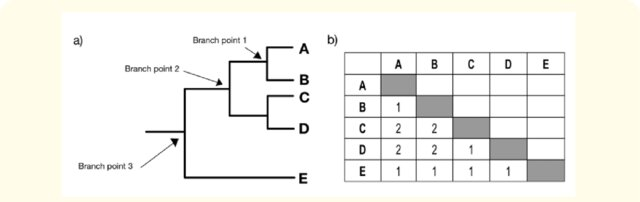

Filogeni Puanlaması Örneği. (a) A ve E organizmaları arasındaki filogenetik ağaç dal noktalarının puanlaması. 1. dal noktası A ve B organizmalarının ortak atasını temsil ederken, 2. dal noktası A, B, C ve D organizmalarının ortak atasını temsil etmektedir. 3. dal noktası A, B, C, D ve E organizmalarının ortak atasını temsil etmektedir.




In [1]:
pip install biopython

In [2]:
# BioPython'dan gerekli kütüphaneleri içe aktarma
from Bio import Phylo, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [3]:
# Dizileri okuyun ve hizalayın
align = AlignIO.read('msa.phy','phylip')
print(align)

Alignment with 6 rows and 3331 columns
CATGCTACTCCACACACCAAGCTATCTAGCCTCCCCAATCCAAA...ATA homo_sapie
CATACTACTCCACACACCAAACTACCTAGCCTCCCCAATCCAAA...ATA chimpanzee
CATGCTACTCCACACACCAAGCTACCTAGTCTCCCCAATCCAAA...ACA bonobo
CATACTACTCCACACACCAAATCATCTAGCCTCCCCAGTCCAGA...ACA gorilla
CATACCACTCCACACCCTATACCATCCAACTTCCCCTATCCGAA...ACA orangutan
CATATCACTCCAAACCCCAAACCATCCAGCCTCCCCAATTCAAA...ACA sumatran


In [4]:
# Uzaklık matrisini hesaplayın
calculator = DistanceCalculator('identity')
distMatrix = calculator.get_distance(align)
print(distMatrix)

homo_sapie  0.000000
chimpanzee  0.226959    0.000000
bonobo  0.220955    0.096968    0.000000
gorilla 0.266887    0.257881    0.249775    0.000000
orangutan   0.317322    0.321825    0.316121    0.322426    0.000000
sumatran    0.314020    0.328130    0.324227    0.328430    0.153107    0.000000
    homo_sapie  chimpanzee  bonobo  gorilla orangutan   sumatran


**UGMA ve NJ algoritmalarını kullanarak filogenetik ağacı oluşturma**

UPGMA (Unweighted group method with arithmetic mean - Aritmetik ortalamalı ağırlıklandırılmamış grup yöntemi), en benzer şeylerle başlayan sıralı bir kümeleme algoritmasıdır. Bu ortalama bağlantılı kümeleme yönteminde mesafeler aritmetik ortalama olarak hesaplanır. UPGMA köklü bir ağaç üretir. Tüm organizmalar arasında evrim oranının aynı olduğunu varsayar.


NJ (Neighbor-Joining) diğer yapraklara olan ortalama mesafeleri de dikkate alır. Köklü olmayan bir ağaç üretir ve pratikte oldukça iyi çalışır.

In [5]:
# Bir DistanceTreeConstructor nesnesi oluşturun
constructor = DistanceTreeConstructor()
# UPGMA algoritması kullanılarak filogenetik ağacın oluşturulması
UPGMATree = constructor.upgma(distMatrix)
# NJ algoritmasını kullanarak filogenetik ağacı oluşturun
NJTree = constructor.nj(distMatrix)

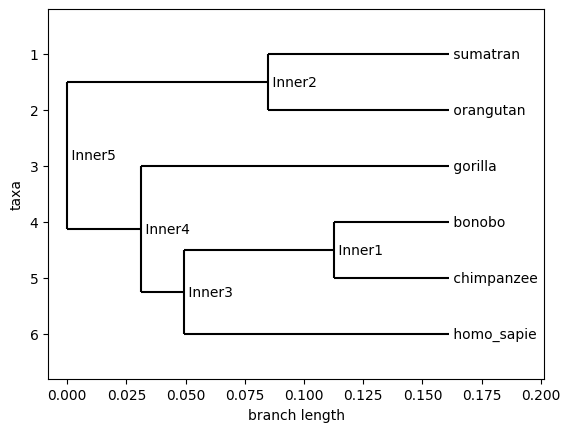

In [6]:
# Filogenetik ağacı çizin
Phylo.draw(UPGMATree)

In [7]:
# Terminal kullanarak filogenetik ağacı çizin
Phylo.draw_ascii(NJTree)

                                         __________________________ sumatran
  ______________________________________|
 |                                      |________________________ orangutan
 |
_|____________________________________________ gorilla
 |
 |     _____________________________________ homo_sapie
 |____|
      |                     ______________ bonobo
      |____________________|
                           |________________ chimpanzee

